
### **Image Caption Generation using Deep Learning**
1.   Juwaria Qadri (2020A7TS0043U)
2.   Chris Mary Benson (2020A7PS0027U)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Bidirectional,LSTM, Embedding, Dropout, add

In [ ]:
import cv2
image_directory = os.listdir('/content/drive/MyDrive/Images_DM')
print (image_directory)


['380034515_4fbdfa6b26.jpg', '380515798_c2abbf46b0.jpg', '381052465_722e00807b.jpg', '377872672_d499aae449.jpg', '381976882_0063d16d88.jpg', '380537190_11d6c0a412.jpg', '378453580_21d688748e.jpg', '378170167_9b5119d918.jpg', '380041023_0dfd712ef1.jpg', '381275595_b429fd1639.jpg', '380590140_25b9889772.jpg', '377872472_35805fc143.jpg', '379006645_b9a2886b51.jpg', '386656845_4e77c3e3da.jpg', '386470686_1ae9242878.jpg', '383223174_7165a54c30.jpg', '384465370_9918873f9a.jpg', '384465575_31294122c0.jpg', '382701159_f98c1988cd.jpg', '385186343_464f5fc186.jpg', '382151094_c7376cf22b.jpg', '385835044_4aa11f6990.jpg', '386655611_1329495f97.jpg', '387830531_e89c192b92.jpg', '388386075_9ac3a89ada.jpg', '386160015_d4b31df68e.jpg', '384577800_fc325af410.jpg', '382090166_be2c2c63e1.jpg', '387078972_514a38dc33.jpg', '387974450_bcd205daac.jpg', '393958545_48c17c66d1.jpg', '392467282_00bb22e201.jpg', '391020801_aaaae1e42b.jpg', '390986651_c801db91a0.jpg', '391579205_c8373b5411.jpg', '390992102_67fa31b2

## **Loading the pre-trained VGG16 model**

In [ ]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

## **Feature Extraction**

In [ ]:
# extract features from image
features = {}
directory = image_directory
i = 0

for img_name in image_directory:
    i = i+1
    print(i)
    img_path = '/content/drive/MyDrive/Images_DM/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

1


KeyboardInterrupt: ignored

In [ ]:
WORKING_DIR = '/content/drive/MyDrive/FeaturesExtracted_DM'

In [ ]:
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [ ]:
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
print(features)

{'380034515_4fbdfa6b26': array([[5.7449474, 4.4093213, 1.8606938, ..., 0.       , 1.5733066,
        0.       ]], dtype=float32), '380515798_c2abbf46b0': array([[1.5425073 , 0.        , 0.        , ..., 0.00650439, 3.4640605 ,
        0.        ]], dtype=float32), '381052465_722e00807b': array([[0.       , 0.       , 3.5439477, ..., 5.7919993, 3.3665357,
        0.       ]], dtype=float32), '377872672_d499aae449': array([[0.       , 0.       , 1.2838573, ..., 0.       , 2.9337816,
        0.       ]], dtype=float32), '381976882_0063d16d88': array([[0.       , 0.       , 0.       , ..., 0.       , 1.5537832,
        0.       ]], dtype=float32), '380537190_11d6c0a412': array([[0.       , 0.       , 0.       , ..., 0.6353529, 3.5821502,
        0.       ]], dtype=float32), '378453580_21d688748e': array([[2.072099  , 0.81611073, 0.556748  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), '378170167_9b5119d918': array([[0.      , 0.      , 0.      , ..., 0.      , 2.19977

In [ ]:
with open(os.path.join('/content/drive/MyDrive/Captions_DM', 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
print(captions_doc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(i)

8101


## **Mapping the image IDs to the captions**

In [ ]:
# create mapping of image to captions
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

## **Preprocessing the captions**

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
        # take one caption at a time
          caption = captions[i]
        # preprocessing steps
        # convert to lowercase
          caption = caption.lower()
        # delete digits, special chars, etc.,
          caption = caption.replace('[^A-Za-z]', '')
        # delete additional spaces
          caption = caption.replace('\s+', ' ')
        # add start and end tags to the caption
          caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
          captions[i] = caption

In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
clean(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

8485

In [ ]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                      i
                      in_seq, out_seq = seq[:i], seq[i]
                      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                      X1.append(features[key][0])
                      X2.append(in_seq)
                      y.append(out_seq)
            if n == batch_size:
                  X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                  yield [X1, X2], y
                  X1, X2, y = list(), list(), list()
                  n = 0

## **Attention Layer**

In [ ]:
import tensorflow as tf
class Attention(tf.keras.Model):
    def __init__(self, units, **kwargs):
        super(Attention, self).__init__()
        self.units = units
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
        super(Attention, self).__init__(**kwargs)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        score = tf.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights
    def get_config(self):
        config = {'units': self.units,}
        base_config = super(Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

## **Model**

In [ ]:

inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
lstm = Bidirectional(LSTM(units=128, return_sequences = True), name="bi_lstm_0")(se2)

(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(units =128, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(10)(lstm, state_h)

print(context_vector.shape)

decoder1 = add([fe2, context_vector])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

plot_model(model, show_shapes=True)

In [ ]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 121s 534ms/step - loss: 2.3439 - accuracy: 0.4159


In [ ]:
model.save('/content/drive/MyDrive/Model_B'+'/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
new_model = load_model('/content/drive/MyDrive/Model_B/best_model.h5', custom_objects={'Attention': Attention})

In [ ]:
image_path = '/content/drive/MyDrive/Images_DM/1222322358_225067636e.jpg'
# load image
image = load_img(image_path, target_size=(224, 224))
# convert image pixels to numpy array
image = img_to_array(image)
# reshape data for model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image from vgg
image = preprocess_input(image)
# extract features
feature = vgg_model.predict(image, verbose=0)
# predict from the trained model
display_image = Image.open(image_path)
plt.imshow(display_image)
predict_caption(new_model, feature, tokenizer, max_length)

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
          return word
    return None

## **Greedy Search**

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
        print(in_text)
    return in_text

## **Beam Search**

In [ ]:
def beam_search(model, image, tokenizer, max_length, K_beams = 3, log = False):
    start = tokenizer.texts_to_sequences(['startseq'])[0]

    start_word = [[start, 0.0]]

    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            sequence  = pad_sequences([s[0]], maxlen=max_length).reshape((1,max_length))
            preds = model.predict([image, sequence], verbose=0)
            word_preds = np.argsort(preds[0])[-K_beams:]

            for w in word_preds:

                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                if log:
                    prob += np.log(preds[0][w])
                else:
                    prob += preds[0][w]
                temp.append([next_cap, prob])
        start_word = temp

        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])

        start_word = start_word[-K_beams:]

    start_word = start_word[-1][0]
    captions_ = [idx_to_word(i, tokenizer) for i in start_word]

    final_caption = []

    for i in captions_:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    final_caption = 'startseq '+final_caption+' endseq'
    return final_caption

In [ ]:
!pip install rouge-score
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
import nltk
from nltk import word_tokenize
nltk.download('wordnet')

def func_tokenize(predicted):
  myList = predicted.split()
  return myList

def func_list_tokenize(actual):
  myList=[]
  for i in actual:
    j = i.split()
    myList.append(j)
  return myList

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Evaluating the test data (BLEU, METEOR, RougeL)**

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt
# validate with test data
actual, predicted = list(), list()
x = ''
i = 0
bleu_1_scores = []
bleu_2_scores = []
rougeL_vals= []
meteor_vals = []
precision_vals = []
recall_vals = []
fmeasure_vals = []

for key in tqdm(test):
    i = i + 1
    if i <= 326:
      prec = 0
      r = 0
      fm = 0
      # get actual caption
      captions = mapping[key]
      # predict the caption for image
      y_pred = predict_caption(new_model, features[key], tokenizer, max_length)
      #y_pred = beam_search(new_model, features[key], tokenizer, max_length, K_beams = 3, log = False)
      x = y_pred
      # split into words
      actual_captions = [caption.split() for caption in captions]
      y_pred = y_pred.split()
      # append to the list
      actual.append(actual_captions)
      predicted.append(y_pred)
      # calcuate BLEU score
      bleu_1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0))
      bleu_2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0))
      #print(actual)
      #print(predicted)
      bleu_1_scores.append(bleu_1)
      bleu_2_scores.append(bleu_2)
      # calculate METEOR score
      #print ('METEOR:',nltk.translate.meteor_score.meteor_score(actual_captions, y_pred))
      #meteor_vals.append(nltk.translate.meteor_score.meteor_score(actual_captions, y_pred))
      # calculate RougeL score
      scores = {key: [] for key in ['rougeL']}
      for act in captions:
        temp_scores = scorer.score(x, act)
        for key in temp_scores:
          scores[key].append(temp_scores[key])
      for i in range(5):
          prec += scores['rougeL'][i].precision
          r += scores['rougeL'][i].recall
          fm += scores['rougeL'][i].fmeasure
      prec = prec/5
      r = r/5
      fm = fm/5
      precision_vals.append(prec)
      recall_vals.append(r)
      fmeasure_vals.append(fm)
      print("RougeL: ")
      print("precision: ", prec)
      print("recall: ", r)
      print("fmeasure: ", fm)

      for key in scores:
        print(f'{key}:\n{scores[key]}')

      print('------------------------------------------------------')

      plt.plot(precision_vals, label='Precision')
      plt.plot(recall_vals, label='Recall')
      plt.plot(fmeasure_vals, label='Fmeasure')
      plt.xlabel('Candidate')
      plt.ylabel('RougeL Score')
      plt.legend()
      plt.title('RougeL Score for Each Candidate')
      plt.show()

print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

startseq man
startseq man in
startseq man in red
startseq man in red shirt
startseq man in red shirt is
startseq man in red shirt is standing
startseq man in red shirt is standing on
startseq man in red shirt is standing on an
startseq man in red shirt is standing on an urban
startseq man in red shirt is standing on an urban area


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Streaming output truncated to the last 5000 lines.
precision:  0.34125541125541126
recall:  0.35
fmeasure:  0.33985507246376806
rougeL:
[Score(precision=0.36363636363636365, recall=0.3333333333333333, fmeasure=0.34782608695652173), Score(precision=0.45454545454545453, recall=0.4166666666666667, fmeasure=0.43478260869565216), Score(precision=0.23809523809523808, recall=0.4166666666666667, fmeasure=0.30303030303030304), Score(precision=0.25, recall=0.25, fmeasure=0.25), Score(precision=0.4, recall=0.3333333333333333, fmeasure=0.3636363636363636)]
------------------------------------------------------
startseq two
startseq two dogs
startseq two dogs are
startseq two dogs are running
startseq two dogs are running through
startseq two dogs are running through the
startseq two dogs are running through the grass
RougeL: 
precision:  0.304010989010989
recall:  0.37777777777777777
fmeasure:  0.3315092835553194
rougeL:
[Score(precision=0.2, recall=0.3333333333333333, fmeasure=0.25), Score(precis

KeyboardInterrupt: ignored

In [ ]:
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

In [ ]:
len(predicted)

In [ ]:
meteor_avg = 0
bleu_1_avg = 0
bleu_2_avg = 0
p = 0
r = 0
f = 0
for val in meteor_vals:
  meteor_avg += val
for val in bleu_1_scores:
  bleu_1_avg += val
for val in bleu_2_scores:
  bleu_2_avg += val
for i in range(len(precision_vals)):
  p += precision_vals[i]
  r += recall_vals[i]
  f += fmeasure_vals[i]
meteor_avg = meteor_avg/y
bleu_1_avg = bleu_1_avg/y
bleu_2_avg = bleu_2_avg/y
f = f/y
r = r/y
p = p/y
print("Average METEOR score: ", meteor_avg)
print("Average BLEU-1 score: ", bleu_1_avg)
print("Average BLEU-2 score: ", bleu_2_avg)
print("Average RougeL score: ", p, r, f)

In [ ]:
print(scores['rougeL'])
prec = 0
r = 0
fm = 0
for i in range(5):
  prec += scores['rougeL'][i].precision
  r += scores['rougeL'][i].recall
  fm += scores['rougeL'][i].fmeasure
prec = prec/5
r = r/5
fm = fm/5
print(prec, r, fm)

[Score(precision=0.4444444444444444, recall=0.4, fmeasure=0.4210526315789474), Score(precision=0.6, recall=0.6, fmeasure=0.6), Score(precision=0.2857142857142857, recall=0.4, fmeasure=0.3333333333333333), Score(precision=0.2857142857142857, recall=0.2, fmeasure=0.23529411764705882), Score(precision=0.3333333333333333, recall=0.3, fmeasure=0.3157894736842105)]
0.38984126984126977 0.38 0.38109391124871


## **Testing the Model**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
vgg_model = VGG16()
vgg_model = Model(inputs=vgg_model.inputs,
                  outputs=vgg_model.layers[-2].output)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join('/content/drive/MyDrive/Images_DM', image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(new_model, features[image_id], tokenizer, max_length)
    b_pred = beam_search(new_model, features[image_id], tokenizer, max_length, K_beams = 3, log = False)
    print('--------------------Predicted--------------------')
    print("Greedy search: ")
    print(y_pred)
    print("Beam search: ")
    print(b_pred)

    plt.imshow(image)

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
['startseq', 'little', 'girl', 'in', 'green', 'dress', 'pokes', 'her', 'head', 'in', 'front', 'of', 'rainbow', 'canvas', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq']
--------------------Predicted--------------------
Greedy search: 
startseq two little girls in elaborate summer outfits are walking down the sidewalk endseq
Beam search: 
little girl in 

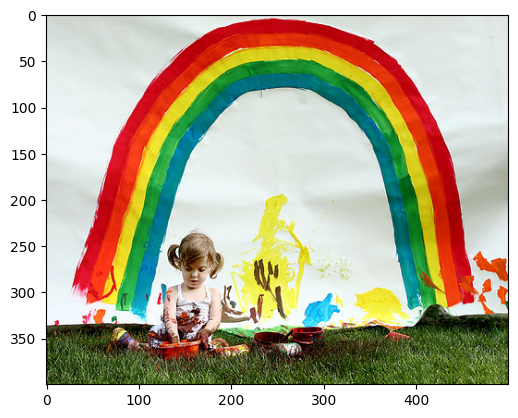

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq brown dog jumping into pool after bloe ball endseq
startseq dog in the air above the swimming pool endseq
startseq dog jumps into backyard pool endseq
startseq tan colored dog is jumping into an outdoor pool endseq
startseq tan colored dog leaps into the inground pool endseq
['startseq', 'brown', 'dog', 'is', 'jumping', 'into', 'pool', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq', 'endseq']
--------------------Predicted--------------------
Greedy search: 
startseq dog is jumping into the water endseq
Beam search: 
brown dog is jumping into pool


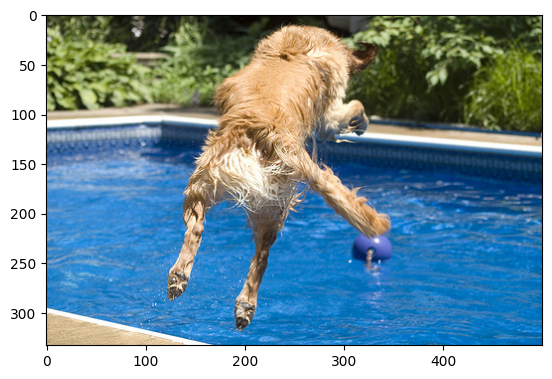

In [ ]:
generate_caption("1178705300_c224d9a4f1.jpg")

---------------------Actual---------------------
startseq woman is walking past an artificial waterfall endseq
startseq woman is walking with someone else beside pond in the city endseq
startseq woman talking on cellphone walking in front of water endseq
startseq woman walks by river across city buildings endseq
startseq young woman in city park near water feature endseq
startseq two
startseq two children
startseq two children walking
startseq two children walking along
startseq two children walking along the
startseq two children walking along the edge
startseq two children walking along the edge of
startseq two children walking along the edge of body
startseq two children walking along the edge of body of
startseq two children walking along the edge of body of water
--------------------Predicted--------------------
Greedy search: 
startseq two children walking along the edge of body of water endseq
Beam search: 
startseq two people walking along the side of body of water endseq


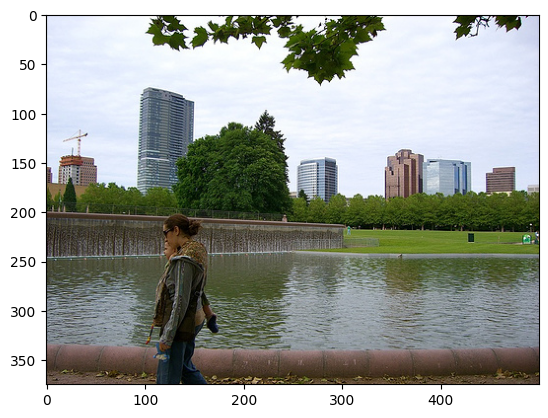

In [ ]:
generate_caption("159712188_d530dd478c.jpg")